## Lab 1.3 - Predicting Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to apply machine learning algorithms to solve business problems. Accurate price prediction can help to find fraudsters automatically and help Yandex.Realty users to make better decisions when buying and selling real estate.

Using python with machine learning algotithms is the #1 option for prototyping solutions among data scientists today. We'll take a look at it in this lab.

### Main objectives
After successful completion of the lab work students will be able to:
-	Apply machine learning for solving price prediction problem
-   Calculate metrics which can help us find out whether our machine learning model is ready for production

### Tasks
-	Encode dataset
-	Split dataset to train and validation datasets
-	Apply decision tree algorithm to build ML (machine learning) model for price predictions
-   Calculate metrics
-   Try other algorithms and factors to get a better solution 


### 1. Load data with real estate prices

In [1]:
# let's import pandas library and set options to be able to view data right in the browser
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')
import numpy as np

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
rent_df_cleaned = pd.read_csv('cleaned_dataset.csv')

In [4]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,building_id,last_price_log
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,8.0,20.0,3.0,6719200042030752141,9.903488
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,10.0,35.0,3.0,6719200042030752141,10.085809
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,0,1,0,36.0,9.0,17.0,3.0,6719200042030752141,9.798127
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,0,1,0,39.0,10.0,18.0,0.0,6719200042030752141,9.798127
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,0,1,0,36.0,8.0,18.0,11.0,6719200042030752141,9.852194


For now we'll drop last_price_log (we'll predict for last_price after scaling), building_id

In [5]:
df = rent_df_cleaned.drop(['last_price_log', 'building_id'], axis=1) 
df

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,8.0,20.0,3.0
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,10.0,35.0,3.0
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,0,1,0,36.0,9.0,17.0,3.0
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,0,1,0,39.0,10.0,18.0,0.0
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,0,1,0,36.0,8.0,18.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
113711,2018-08-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,22000.0,4,0,1,0,40.0,10.0,18.0,0.0
113712,2018-08-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,26000.0,2,0,1,0,32.0,8.0,24.0,0.0
113713,2018-08-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,27000.0,1,0,1,0,39.0,8.0,20.0,0.0
113714,2018-08-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,50000.0,2,0,2,0,56.0,7.0,32.0,0.0


### Encoding renovation

In [6]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
renovation_encoded = encoder.fit_transform(df[['renovation']])
renovation_encoded = pd.DataFrame(data = renovation_encoded, columns=encoder.categories_)

In [7]:
renovation_encoded

,0.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
113711,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop('renovation', axis=1, inplace=True)

In [9]:
df = pd.concat([df,renovation_encoded], axis=1)

In [10]:
df.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,"(0.0,)","(1.0,)","(2.0,)","(3.0,)","(4.0,)","(6.0,)","(7.0,)","(8.0,)","(10.0,)","(11.0,)"
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,8.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,10.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,0,1,0,36.0,9.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,0,1,0,39.0,10.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,0,1,0,36.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Creating datasets training, testing and a holdout dataset.

In [11]:
# select all offers added the first 3 months of 2018 as train dataset.

train_df = df[(df.first_day_exposition >= '2018-01-01') & (df.first_day_exposition < '2018-04-01')]

In [12]:
# select all offers added in april and may 2018 as test dataset.

test_df = df[(df.first_day_exposition >= '2018-04-01') & (df.first_day_exposition < '2018-06-01')]

In [13]:
# let's use latest data from 2018-06-01 as a hodout dataset to simulate how algorithms would
# behave in production

holdout_df = df[df.first_day_exposition >= '2018-06-01']

In [14]:
train_df.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,"(0.0,)","(1.0,)","(2.0,)","(3.0,)","(4.0,)","(6.0,)","(7.0,)","(8.0,)","(10.0,)","(11.0,)"
21,2018-01-20T00:00:00+03:00,2018-02-28T00:00:00+03:00,17500.0,9,0,1,0,32.0,7.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2018-02-09T00:00:00+03:00,2018-03-03T00:00:00+03:00,16000.0,4,0,1,0,38.0,8.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2018-03-26T00:00:00+03:00,2018-03-30T00:00:00+03:00,20000.0,5,0,1,0,32.0,7.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2018-02-02T00:00:00+03:00,2018-02-24T00:00:00+03:00,50000.0,7,0,2,0,85.0,18.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,2018-02-15T00:00:00+03:00,2018-02-25T00:00:00+03:00,50000.0,7,0,2,0,78.0,17.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Getting rid of dates/timestamps for now (for decision tree)

In [15]:
train_df.drop(['first_day_exposition','last_day_exposition'], axis=1, inplace=True)
test_df.drop(['first_day_exposition','last_day_exposition'], axis=1, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
train_df.head()

,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,"(0.0,)","(1.0,)","(2.0,)","(3.0,)","(4.0,)","(6.0,)","(7.0,)","(8.0,)","(10.0,)","(11.0,)"
21,17500.0,9,0,1,0,32.0,7.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,16000.0,4,0,1,0,38.0,8.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,20000.0,5,0,1,0,32.0,7.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,50000.0,7,0,2,0,85.0,18.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,50000.0,7,0,2,0,78.0,17.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building Decision Tree model

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [18]:
# Dividing datasets into features and target variables

X_train = train_df.drop('last_price', axis=1)
y_train = train_df[['last_price']]
X_test = test_df.drop('last_price', axis=1)
y_test = test_df[['last_price']]

In [19]:
# Defining Scalers
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scaling datasets
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
tree = DecisionTreeRegressor(random_state=0)

params = {'max_depth': [i for i in range(1, 10, 1)] + [i for i in range(10, 101, 10)],
          'min_samples_leaf': [i for i in range(1, 10, 1)] + [i for i in range(10, 101, 10)]}

tree_gs = GridSearchCV(estimator=tree, param_grid=params, 
                       scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 
                                'neg_root_mean_squared_error'], n_jobs=1, refit='neg_root_mean_squared_error', 
                       cv=5, verbose=1)

tree_gs.fit(X_train, y_train)

Fitting 5 folds for each of 361 candidates, totalling 1805 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                       40, 50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                              30, 40, 50, 60, 70, 80, 90,
                                              100]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [22]:
pd.DataFrame(tree_gs.cv_results_)[['params', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'mean_test_neg_root_mean_squared_error'
                                   ]].sort_values('mean_test_neg_root_mean_squared_error', ascending=False)

,params,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error
299,"{'max_depth': 70, 'min_samples_leaf': 60}",-0.370841,-0.409423,-0.639426
242,"{'max_depth': 40, 'min_samples_leaf': 60}",-0.370841,-0.409423,-0.639426
318,"{'max_depth': 80, 'min_samples_leaf': 60}",-0.370841,-0.409423,-0.639426
337,"{'max_depth': 90, 'min_samples_leaf': 60}",-0.370841,-0.409423,-0.639426
280,"{'max_depth': 60, 'min_samples_leaf': 60}",-0.370841,-0.409423,-0.639426
...,...,...,...,...
228,"{'max_depth': 40, 'min_samples_leaf': 1}",-0.493844,-0.781587,-0.881510
247,"{'max_depth': 50, 'min_samples_leaf': 1}",-0.493844,-0.781587,-0.881510
304,"{'max_depth': 80, 'min_samples_leaf': 1}",-0.493844,-0.781587,-0.881510
323,"{'max_depth': 90, 'min_samples_leaf': 1}",-0.493844,-0.781587,-0.881510


In [23]:
tree_predictions = tree_gs.predict(X_test)

In [24]:
tree_predictions[:5]

array([-0.66370578,  1.69542111,  0.04462274,  0.04427123,  0.47465521])

In [25]:
predictions = sc_y.inverse_transform(tree_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: 16324.474963220204, True Value 19000.0
Prediction: 56179.24497820972, True Value 45000.0
Prediction: 28290.881071357526, True Value 35000.0
Prediction: 28284.942672041085, True Value 35000.0
Prediction: 35555.79130403107, True Value 35000.0


In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, tree_predictions))
print('MSE:', metrics.mean_squared_error(y_test, tree_predictions))
print('RMSE:', metrics.mean_squared_error(y_test, tree_predictions, squared=False))

MAE: 0.3630687819816098
MSE: 0.42127378640053376
RMSE: 0.6490560733869869


### Catboost

In [27]:
pip -q install catboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
from catboost import CatBoostRegressor, Pool

Since I want to add more features to the catboost model, and also CatBoost can process categorical features without separate OneHotEncoder preprocessing, I'll further work with initial <i>rent_df_cleaned</i> dataset aquired in the previous lab.

First, we'll get rid of the logarithmic transformation of <i>last_price</i>, since we're going to transform it (scale) anyway:

In [29]:
cb_df = rent_df_cleaned
cb_df.drop('last_price_log', axis=1, inplace=True)
cb_df.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,building_id
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,8.0,20.0,3.0,6719200042030752141
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,10.0,35.0,3.0,6719200042030752141
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,0,1,0,36.0,9.0,17.0,3.0,6719200042030752141
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,0,1,0,39.0,10.0,18.0,0.0,6719200042030752141
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,0,1,0,36.0,8.0,18.0,11.0,6719200042030752141


Next, we'll transform timestamps (<i>first_day_exposition</i> and <i>last_day_exposition</i>) to time format, and also add a feature of <i>exposition_duration</i> in days - the difference in days between first and last day of exposition. For further explanation of why this feature should be added, please refer to the previous lab.

In [30]:
# Dealing with time

cb_df.first_day_exposition = pd.to_datetime(cb_df.first_day_exposition)
cb_df.last_day_exposition = pd.to_datetime(cb_df.last_day_exposition)

cb_df['exposition_duration'] = pd.to_datetime(cb_df.last_day_exposition) - pd.to_datetime(cb_df.first_day_exposition)
cb_df.exposition_duration = cb_df.exposition_duration.dt.days

Here we'll transform <i>renovation</i> feature values from <i>float</i> to <i>int</i>, since CatBoost can't process categorical features as float, and, anyway, having them as floats does not add informativeness or meaning:

In [31]:
cb_df.renovation = cb_df.renovation.astype(int)

We'll also add a calculated feature - <i>average room area</i> - which is defined as a division of the whole living area of the apartment by its number of rooms. For clarification for why this feature might be beneficial for our model, again, please refer to previously submitted file of lab 1.2.

In [32]:
cb_df['av_room_area'] = (cb_df.living_area / cb_df.rooms)

As previously, we'll scale our features: first we'll scale <i>last_price</i> as our target variable with scaler for y's, then, with scales for X's, we'll scale all numerical features: <i>area (total, living and kitchen) and av_room_area</i>.

In [34]:
cb_df.last_price = sc_y.fit_transform(cb_df[['last_price']])

cb_df.area = sc_X.fit_transform(cb_df[['area']])
cb_df.kitchen_area = sc_X.fit_transform(cb_df[['kitchen_area']])
cb_df.living_area = sc_X.fit_transform(cb_df[['living_area']])
cb_df.av_room_area = sc_X.fit_transform(cb_df[['av_room_area']])

We'll also scale our numerical feature of <i>exposition_duration</i>:

In [37]:
cb_df.exposition_duration = sc_X.fit_transform(cb_df[['exposition_duration']])

Now let's look at the resulting dataset:

In [38]:
cb_df.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,building_id,exposition_duration,av_room_area
0,2015-01-24 00:00:00+03:00,2016-01-19 00:00:00+03:00,-0.607734,7,0,1,0,-1.168867,-0.604719,-0.670595,3,6719200042030752141,1.113902,0.503764
1,2015-11-17 00:00:00+03:00,2016-03-04 00:00:00+03:00,-0.396936,4,0,2,0,0.229543,-0.205395,0.357316,3,6719200042030752141,-0.033036,-0.108718
2,2015-11-17 00:00:00+03:00,2016-04-24 00:00:00+03:00,-0.713132,6,0,1,0,-0.807987,-0.405057,-0.876177,3,6719200042030752141,0.199083,-0.231214
3,2016-02-04 00:00:00+03:00,2016-02-28 00:00:00+03:00,-0.713132,8,0,1,0,-0.672657,-0.205395,-0.807650,0,6719200042030752141,-0.415348,0.013779
4,2016-02-28 00:00:00+03:00,2016-04-02 00:00:00+03:00,-0.660433,3,0,1,0,-0.807987,-0.604719,-0.807650,11,6719200042030752141,-0.369835,0.013779


Now we'll form a list of categorical features for CatBoost regressor to take in during training. <i>Renovation</i> and <i>building_id</i> are certainly categorical. As for the <i>floor</i>, we put it into categorical features, since alone, without info on building's height (total number of floors), it does not provide much meaning, thus cannot really be treated as numeric. 

<b>NB:</b> <i>Consider this: 2 apartments are on the 7th floor in different buildings, but one of these buildings is 7-storied, so it's the upper floor right under the roof, and another is 18-storied, so the apartment is somewhere in the middle of it. Clearly, although in the dataset both apartments have seventh floor in the corresponding column, the implications for them are different. What I'm getting at is that not only the distance in floors from the ground is important, but also the distance from the roof, but we do not have this info in our dataset, thus cannot drive a full meaningful conclusion from the floor feature. It still is important, but cannot be used to properly compare different apartments, which is necessary for a feature to be qualified as interval or ratio one. Therefore I suppose we should not treat number of the floor in this case as strictly numeric, thus I intend to treat it as categorical. </i>

In [36]:
categorical_features = ['renovation', 'building_id', 'floor']

Next we split the dataset into training, test and hold-out sets, just the same way we did previously for a decision tree.

In [39]:
# select all offers added the first 3 months of 2018 as train dataset.

cb_train_df = cb_df[(cb_df.first_day_exposition >= '2018-01-01') & (cb_df.first_day_exposition < '2018-04-01')]

In [40]:
# select all offers added in april and may 2018 as test dataset.

cb_test_df = cb_df[(cb_df.first_day_exposition >= '2018-04-01') & (cb_df.first_day_exposition < '2018-06-01')]

In [41]:
# let's use latest data from 2018-06-01 as a hodout dataset to simulate how algorithms would
# behave in production

cb_holdout_df = cb_df[cb_df.first_day_exposition >= '2018-06-01']

Finally, we take out the <i>last_price</i> for train and test sets into a different data object, and we're ready to go.

In [42]:
# Dividing datasets into features and target variables

X_train_cb = cb_train_df.drop('last_price', axis=1)
y_train_cb = cb_train_df[['last_price']]
X_test_cb = cb_test_df.drop('last_price', axis=1)
y_test_cb = cb_test_df[['last_price']]

Here we define our learning and evaluation pools and our model:

In [43]:
learn_pool = Pool(X_train_cb, y_train_cb, cat_features=categorical_features, feature_names=list(X_train_cb))
test_pool = Pool(X_test_cb, y_test_cb, cat_features=categorical_features, feature_names=list(X_test_cb))

cb = CatBoostRegressor(iterations=1000, learning_rate=0.1,
                        random_state=0, eval_metric='RMSE', loss_function='RMSE')
cb.fit(learn_pool, eval_set=test_pool, verbose=100)

0:	learn: 0.8567440	test: 0.8449402	best: 0.8449402 (0)	total: 56.4ms	remaining: 56.3s
100:	learn: 0.4710798	test: 0.5128960	best: 0.5128960 (100)	total: 674ms	remaining: 6s
200:	learn: 0.4269803	test: 0.5113444	best: 0.5104808 (159)	total: 1.35s	remaining: 5.37s
300:	learn: 0.3994733	test: 0.5122700	best: 0.5104808 (159)	total: 2.04s	remaining: 4.73s
400:	learn: 0.3796710	test: 0.5147096	best: 0.5104808 (159)	total: 2.7s	remaining: 4.03s
500:	learn: 0.3606321	test: 0.5159994	best: 0.5104808 (159)	total: 3.41s	remaining: 3.4s
600:	learn: 0.3456670	test: 0.5172940	best: 0.5104808 (159)	total: 4.14s	remaining: 2.75s
700:	learn: 0.3344363	test: 0.5190231	best: 0.5104808 (159)	total: 4.83s	remaining: 2.06s
800:	learn: 0.3239997	test: 0.5197928	best: 0.5104808 (159)	total: 5.52s	remaining: 1.37s
900:	learn: 0.3140429	test: 0.5218212	best: 0.5104808 (159)	total: 6.22s	remaining: 684ms
999:	learn: 0.3050115	test: 0.5228766	best: 0.5104808 (159)	total: 6.94s	remaining: 0us

bestTest = 0.510480

<b>And the result seems rather good!</b>

Around 0.5 on test data, much better than that for Decision Tree Regressor

One more time we calculate key regression metrics (MAE, MSE and RMSE), now for a CatBoost model:

In [46]:
cb_predictions = cb.predict(X_test_cb)
print('MAE:', metrics.mean_absolute_error(y_test_cb, cb_predictions))
print('MSE:', metrics.mean_squared_error(y_test_cb, cb_predictions))
print('RMSE:', metrics.mean_squared_error(y_test_cb, cb_predictions, squared=False))

MAE: 0.28106793443973144
MSE: 0.2605906749903021
RMSE: 0.5104808272504483


And visualize the true y values against predicted ones:

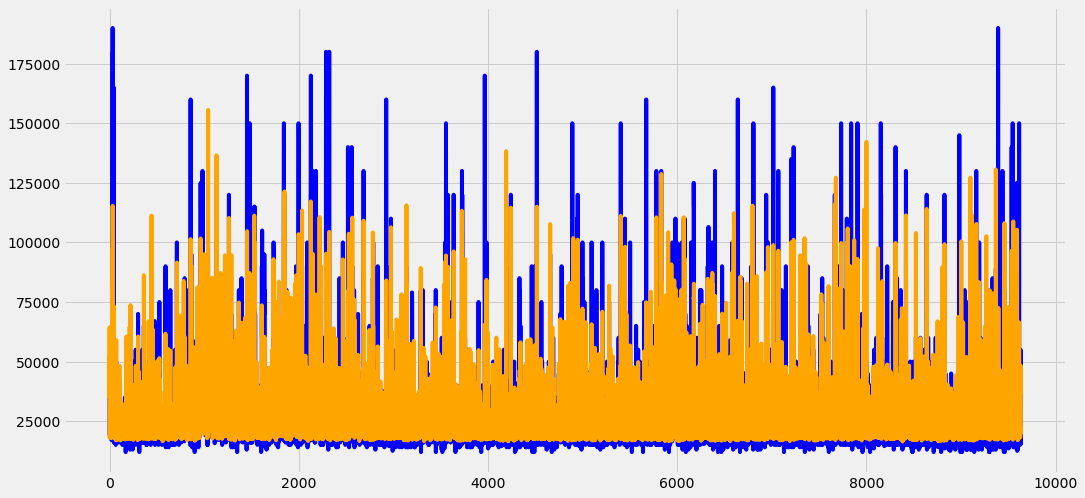

In [47]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_test_cb),label ='Test', color= 'blue')
plt.plot(sc_y.inverse_transform(cb_predictions), label = 'predict', color = 'orange')
plt.show()

## Save the model, encoder and the scaler in a pickle file

We did not use the encoder in the resulting CatBoost model, rather there was an embedded method for categorical features processing. Anyway, just to be sure, just in case, we'll save it in pickle.

In [49]:
encoder.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8., 10., 11.])]

In [50]:
import joblib

Finally, saving to pickle file our best model, scalers and encoder:

In [51]:
joblib_file = 'pavlova_model.pkl'
joblib.dump(encoder, joblib_file)
joblib.dump(sc_X, joblib_file)
joblib.dump(sc_y,joblib_file)
joblib.dump(cb, joblib_file)



['pavlova_model.pkl']